# Import Library

In [3]:
import numpy as np #untuk operasi matematika
import pandas as pd #untuk operasi data
import statsmodels.api as sm #untuk membangun model
import matplotlib.pyplot as plt #untuk melakukan visualisasi data
from sklearn.linear_model import LinearRegression #untuk membangun model Machine Learning Linear Regression
import seaborn as sns #untuk visualisasi data yg advance
sns.set() #menset sns untuk aktif

# Load Data

In [7]:
raw_data = pd.read_csv("Dataset Penjualan Mobil.csv")
raw_data.head(20)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


Dalam kasus ini karena kita akan mencari tahu harga prediksi penjualan mobil maka Price yang akan menjadi estimator dan yang lainnya adalah variabel predictor
Tentukan mana yang estimator mana yang predictor

variabel estimator =
variabel predictor = 

variabel agresor = variabel predictor yg keliatannya memiliki peluang untuk memprediksi lebih tepat atau memiliki pengaruh lebih tinggi dalam menentukan estimator 

# Data Preprocessing

## Exploring the descriptive statistics

In [10]:
raw_data.describe() #hanya menampilkan tipe data numerikal


,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [11]:
raw_data.describe(include ="all") #menampilkan seluruh data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Determine Unnecessary variable

In [12]:
data = raw_data.drop(["Model"],axis = 1)

In [13]:
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [14]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [17]:
data.isnull().sum() #cek data yg missing. Kosong tidak bernilai. Jika data missing <5% dari jumlah total data, maka bisa di drop  

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [18]:
data_no_mv = data.dropna(axis=0)

In [19]:
data_no_mv.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the probability distribusion functions (PDFs)

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

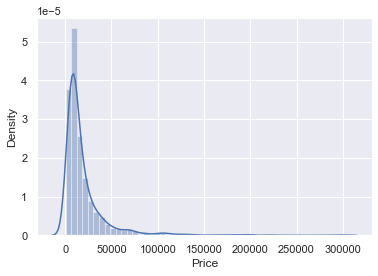

In [20]:
sns.distplot(data_no_mv["Price"])

## Dealing with outliers


In [27]:
q = data_no_mv["Price"].quantile(0.99) #melihat data kuantile di 99% / 0.99
q

129812.51999999981

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

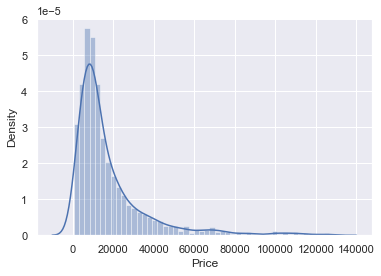

In [31]:
data_1 = data_no_mv[data_no_mv["Price"]< q]
sns.distplot(data_1["Price"])

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

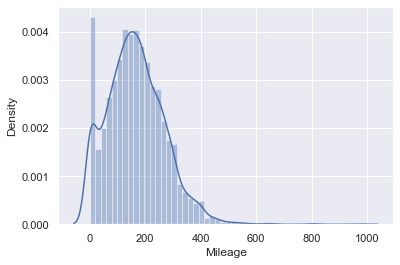

In [33]:
sns.distplot(data_1["Mileage"])

In [36]:
q = data_1["Mileage"].quantile(0.99)
q

435.5100000000002

In [41]:
data_2 = data_1[data_1["Mileage"] < q ]

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

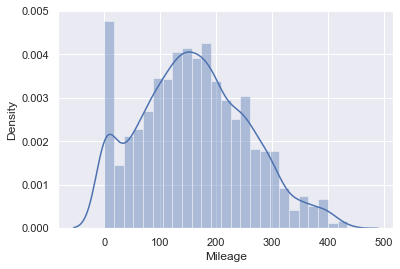

In [42]:
sns.distplot(data_2["Mileage"])

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

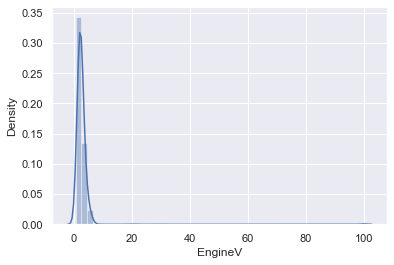

In [44]:
sns.distplot(data_2["EngineV"])

In [46]:
data_2["EngineV"].head()

0    2.0
1    2.9
2    5.0
3    4.2
4    2.0
Name: EngineV, dtype: float64

In [47]:
data_2["EngineV"].tail()

4339    1.6
4340    3.0
4341    3.5
4342    2.0
4344    2.0
Name: EngineV, dtype: float64

In [50]:
data_2["EngineV"]

0       2.0
1       2.9
2       5.0
3       4.2
4       2.0
       ... 
4339    1.6
4340    3.0
4341    3.5
4342    2.0
4344    2.0
Name: EngineV, Length: 3944, dtype: float64

In [67]:
pd.set_option('display.max_rows', 500)

              Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3      

In [83]:
data_2['EngineV'].sort_values().tail(500)

1034     3.50
2052     3.50
3637     3.50
1027     3.50
2653     3.50
2989     3.50
3019     3.50
559      3.50
4183     3.50
1092     3.50
2316     3.50
1891     3.50
1887     3.50
2750     3.50
4210     3.50
4213     3.50
4214     3.50
2754     3.50
605      3.50
1759     3.50
64       3.50
4272     3.50
4341     3.50
2851     3.50
52       3.50
1017     3.50
2730     3.50
520      3.50
619      3.50
2296     3.50
1978     3.50
2676     3.50
3409     3.50
1279     3.50
532      3.50
1315     3.50
1115     3.50
2697     3.50
4087     3.50
2284     3.50
163      3.50
2387     3.50
1672     3.50
3545     3.50
2956     3.50
1678     3.50
2789     3.50
4128     3.50
1106     3.50
2721     3.50
1473     3.50
1838     3.50
3683     3.50
3812     3.50
3301     3.50
3246     3.50
2823     3.50
3245     3.50
1484     3.50
1216     3.50
2534     3.50
2174     3.50
1798     3.50
3754     3.50
4314     3.50
1534     3.50
1511     3.50
1207     3.50
3791     3.50
1540     3.50
3803     3.50
3225  

In [85]:
data_3 = data_2[data_2["EngineV"] < 6.5]

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

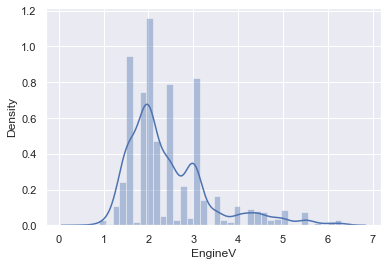

In [86]:
sns.distplot(data_3["EngineV"])

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

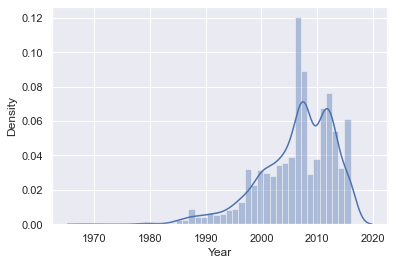

In [87]:
sns.distplot(data_3["Year"])

In [91]:
q = data_3["Year"].quantile(0.01)
q

1987.0

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

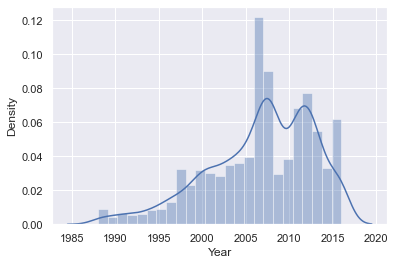

In [94]:
data_4 = data_3[data_3["Year"] > q]
sns.distplot(data_4["Year"])

In [115]:
data_cleaned = data_4.reset_index(drop=True)

In [116]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Examining Assumptions
## Check Linearity with scatterplot

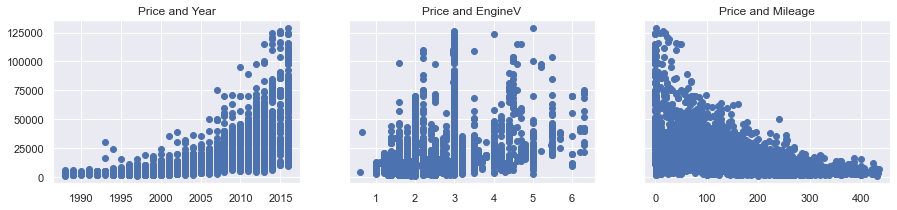

In [117]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))#sharey -> share 'Price' as y
ax1.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title("Price and Mileage")

plt.show()

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

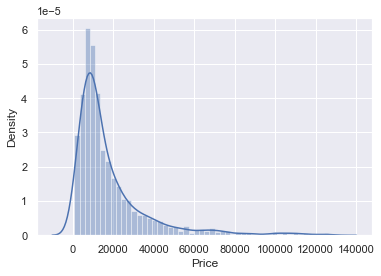

In [101]:
sns.distplot(data_cleaned["Price"])

# Relaxing the Assumption

modifikasi data supaya bisa dekat dengan normal

In [118]:
#Transformasi Log
log_price = np.log(data_cleaned["Price"])
data_cleaned["Log_Price"] = log_price

data_cleaned.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,7.824046


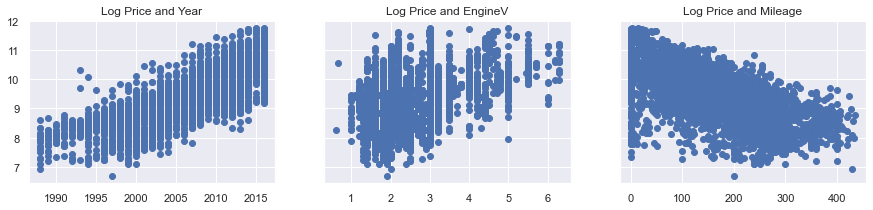

In [119]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))#sharey -> share 'Price' as y
ax1.scatter(data_cleaned["Year"],data_cleaned["Log_Price"])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Log_Price"])
ax2.set_title("Log Price and EngineV")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Log_Price"])
ax3.set_title("Log Price and Mileage")

plt.show()

In [120]:
data_cleaned = data_cleaned.drop(["Price"],axis = 1)

In [121]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


# Multicollinearity

artinya tidak boleh adanya hubungan antara variabel independen

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i)for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [127]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [129]:
data_no_multi = data_cleaned.drop(["Year"], axis = 1)

In [130]:
data_no_multi.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## Create Dummy Variable

In [131]:
data_with_dummies = pd.get_dummies(data_no_multi, drop_first =True)

In [132]:
data_with_dummies.head()

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rearrange the column

In [133]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [134]:
cols = ['Log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [135]:
data_preprocessed = data_with_dummies[cols]

In [136]:
data_preprocessed.head()

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

## Declare the inputs and the targets

In [137]:
targets = data_preprocessed["Log_Price"]
inputs = data_preprocessed.drop(["Log_Price"], axis = 1 )

## Scale the data

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [139]:
inputs_scaled = scaler.transform(inputs)

In [140]:
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

## Train Test Split

In [141]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

## Create the regression

In [142]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [144]:
y_hat = reg.predict(x_train) #melihat hasil prediksi dari x train

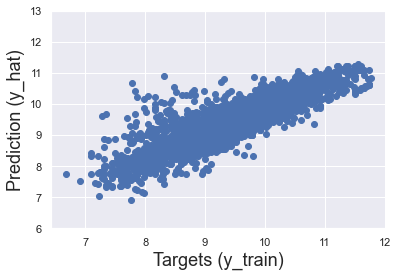

In [145]:
plt.scatter(y_train,y_hat)
plt.xlabel("Targets (y_train)", size = 18)
plt.ylabel("Prediction (y_hat)", size = 18)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

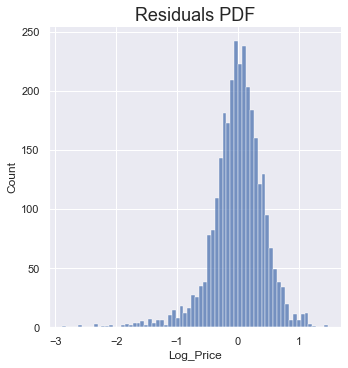

In [147]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF" ,size = 18)

In [148]:
reg.score(x_train,y_train)

0.744996578792662

## Finding the weights and bias

In [149]:
reg.intercept_

9.415239458021297

In [150]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [151]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


## Testing

In [152]:
#y_hat = hasil prediksi
y_hat_test= reg.predict(x_test)

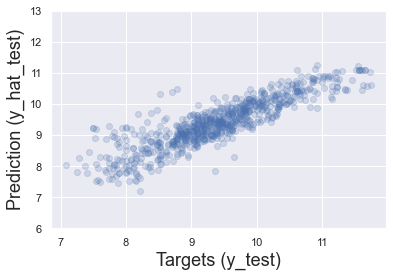

In [155]:
plt.scatter(y_test,y_hat_test, alpha = 0.2)
plt.xlabel("Targets (y_test)", size = 18)
plt.ylabel("Prediction (y_hat_test)", size = 18)
plt.ylim(6,13)
plt.show()

In [161]:
df_perform = pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])
df_perform.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [164]:
df_perform["Target"] = np.exp(y_test.reset_index(drop=True))
df_perform.tail(100)

,Prediction,Target
674,2381.009600,2700.00
675,13476.896662,22500.00
676,6861.836176,7300.00
677,9631.075199,3799.00
678,4569.152691,6900.00
679,25864.650496,69990.00
680,21493.442073,9000.00
681,5195.688374,4100.00
682,5454.338329,5000.00
683,32771.449749,44800.00


In [166]:
df_perform["Residual"] = df_perform["Target"] - df_perform["Prediction"]
df_perform.head()

,Prediction,Target,Residual
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075


In [169]:
df_perform["Difference%"] = np.absolute(df_perform["Residual"]/df_perform["Target"]*100)
df_perform.head()

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [173]:
pd.options.display.max_rows = 999
pd.set_option("display.float_format", lambda x: "%.2f" %x)
df_perform.sort_values(by=["Difference%"])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


In [174]:
df_perform.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,15946.76,18165.82,2219.06,36.26
std,13133.20,19967.86,10871.22,55.07
min,1320.56,1200.00,-29456.50,0.06
25%,7413.64,6900.00,-2044.19,12.11
50%,11568.17,11600.00,142.52,23.47
75%,20162.41,20500.00,3147.34,39.56
max,77403.06,126000.00,85106.16,512.69
